<a href="https://colab.research.google.com/github/kunyoungPark/lab/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 분류

## 데이터 준비

In [1]:
import tensorflow as tf

In [2]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)

In [4]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [5]:
x_train.shape

(48000, 28, 28)

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [7]:
x_train.shape

(48000, 28, 28, 1)

In [8]:
x_train = x_train / 255
x_val = x_val / 255

## 합성곱 신경망 모델

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv1.add(MaxPooling2D((2, 2)))
conv1.add(Flatten())
conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

In [ ]:
conv1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 10)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1960)              0         
                                                                 
 dense (Dense)               (None, 100)               196100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
__________________________________________________

In [ ]:
conv1.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = conv1.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 13s 3ms/step - loss: 0.4641 - accuracy: 0.8357 - val_loss: 0.3766 - val_accuracy: 0.8652
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3279 - accuracy: 0.8824 - val_loss: 0.3101 - val_accuracy: 0.8907
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2765 - accuracy: 0.9002 - val_loss: 0.2993 - val_accuracy: 0.8969
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2427 - accuracy: 0.9123 - val_loss: 0.2911 - val_accuracy: 0.8945
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2130 - accuracy: 0.9213 - val_loss: 0.2588 - val_accuracy: 0.9107
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1906 - accuracy: 0.9301 - val_loss: 0.2515 - val_accuracy: 0.9149
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1702 - accuracy: 0.9371 - val_loss: 0.2772 - val_accuracy

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
loss, accuracy = conv1.evaluate(x_val, y_val_encoded, verbose=0)

In [ ]:
print(accuracy)

## Dropout

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2, 2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

In [ ]:
conv2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1960)              0         
                                                                 
 dropout (Dropout)           (None, 1960)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               196100    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                      

In [ ]:
conv2.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = conv2.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4936 - accuracy: 0.8229 - val_loss: 0.3343 - val_accuracy: 0.8802
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3621 - accuracy: 0.8675 - val_loss: 0.3076 - val_accuracy: 0.8911
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3246 - accuracy: 0.8796 - val_loss: 0.2833 - val_accuracy: 0.8967
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3005 - accuracy: 0.8885 - val_loss: 0.2715 - val_accuracy: 0.9034
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2816 - accuracy: 0.8946 - val_loss: 0.2513 - val_accuracy: 0.9094
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2661 - accuracy: 0.9009 - val_loss: 0.2456 - val_accuracy: 0.9111
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2531 - accuracy: 0.9062 - val_loss: 0.2444 - val_accuracy:

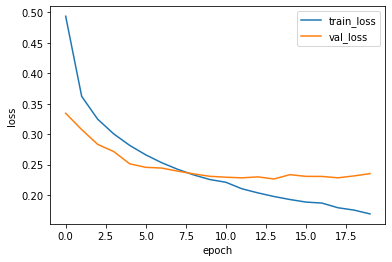

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

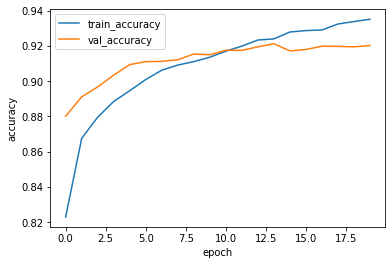

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
loss, accuracy = conv2.evaluate(x_val, y_val_encoded, verbose=0)

In [ ]:
print(accuracy)

0.9202499985694885
